In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
filepath_1 = '/Users/eliasrapkin-siles/Downloads/Machine Learning 1/Project/22Q2 Files/CRISPR_gene_effect.csv'
CRISPR_gene_effect = pd.read_csv(filepath_1)

filepath_2 = '/Users/eliasrapkin-siles/Downloads/Machine Learning 1/Project/22Q2 Files/CRISPR_gene_dependency.csv'
CRISPR_gene_dependency = pd.read_csv(filepath_2)

filepath_3 = '/Users/eliasrapkin-siles/Downloads/Machine Learning 1/Project/22Q2 Files/CCLE_expression.csv'
CCLE_expression = pd.read_csv(filepath_3)

filepath_4 = '/Users/eliasrapkin-siles/Downloads/Machine Learning 1/Project/22Q2 Files/CCLE_mutations.csv'
CCLE_mutations = pd.read_csv(filepath_4)

filepath_5 = '/Users/eliasrapkin-siles/Downloads/Machine Learning 1/Project/22Q2 Files/CCLE_gene_cn.csv'
CCLE_gene_cn = pd.read_csv(filepath_5)

filepath_6 = '/Users/eliasrapkin-siles/Downloads/Machine Learning 1/Project/22Q2 Files/CCLE_wes_gene_cn.csv'
CCLE_wes_gene_cn = pd.read_csv(filepath_6)

filepath_7 = '/Users/eliasrapkin-siles/Downloads/Machine Learning 1/Project/22Q2 Files/sample_info.csv'
sample_info = pd.read_csv(filepath_7)

/var/folders/qx/6y9gqv7j3391j3h9zc57b70m0000gn/T/ipykernel_81457/1637268288.py:11: DtypeWarning: Columns (3,19,22,27,28,29,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  CCLE_mutations = pd.read_csv(filepath_4)


In [21]:
sample_info = sample_info[['DepMap_ID', 'sex', 'sample_collection_site', 'primary_disease', 'Subtype', 'age', 'lineage', 'lineage_subtype',
                           'lineage_sub_subtype','Cellosaurus_NCIt_disease']]

primary_disease
Lung Cancer                   272
Leukemia                      137
Skin Cancer                   119
Lymphoma                      110
Brain Cancer                  106
Non-Cancerous                 103
Colon/Colorectal Cancer        85
Breast Cancer                  83
Head and Neck Cancer           79
Bone Cancer                    79
Ovarian Cancer                 73
Pancreatic Cancer              60
Kidney Cancer                  55
Gastric Cancer                 48
Neuroblastoma                  47
Sarcoma                        44
Endometrial/Uterine Cancer     40
Bladder Cancer                 39
Esophageal Cancer              38
Bile Duct Cancer               36
Myeloma                        35
Liver Cancer                   27
Cervical Cancer                24
Thyroid Cancer                 21
Rhabdoid                       20
Prostate Cancer                13
Unknown                        13
Eye Cancer                     11
Liposarcoma                    1

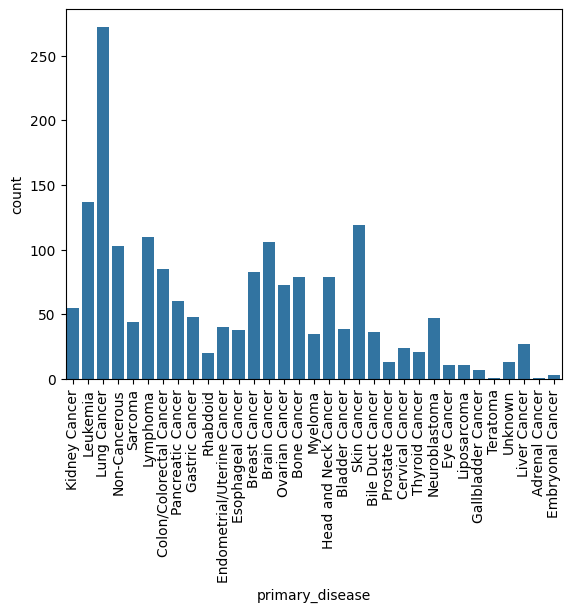

In [22]:
diseases = sample_info['primary_disease'].value_counts()
unique_values = sample_info['primary_disease'].unique()

display(sample_info['primary_disease'].value_counts())
sns.countplot(x="primary_disease", data=sample_info)
plt.xticks(rotation=90)
plt.show()

In [23]:
CRISPR_gene_effect_master_df = pd.merge(sample_info, CRISPR_gene_effect, on="DepMap_ID", how="outer")

# Filter and store DataFrames for each unique 'primary_disease'
for value in unique_values:
    # Filter the master DataFrame based on 'primary_disease'
    filtered_df = CRISPR_gene_effect_master_df[CRISPR_gene_effect_master_df['primary_disease'] == value]
    describe_df = filtered_df.describe()
    
    data_by_mean = describe_df.loc[:, describe_df.loc['mean'].sort_values(ascending=True).index]
    print(value)
    print(data_by_mean.iloc[:, :10])


Kidney Cancer
       RAN (5901)  RPL15 (6138)  POLR2L (5441)  RRM2 (6241)  RPL4 (6124)  \
count   29.000000     29.000000      29.000000    29.000000    29.000000   
mean    -2.725668     -2.624429      -2.620772    -2.568378    -2.521487   
std      0.125573      0.123708       0.107112     0.095781     0.112500   
min     -3.005128     -2.802173      -2.862793    -2.747697    -2.820764   
25%     -2.804446     -2.714082      -2.677268    -2.621262    -2.566493   
50%     -2.741343     -2.638154      -2.620833    -2.556394    -2.519148   
75%     -2.632738     -2.584512      -2.567083    -2.495817    -2.438095   
max     -2.422995     -2.303358      -2.339567    -2.360698    -2.338459   

       RPS29 (6235)  HSPE1 (3336)  RPL23 (9349)  SNRPA1 (6627)  SNRPB (6628)  
count     29.000000     29.000000     29.000000      29.000000     29.000000  
mean      -2.502605     -2.488139     -2.458845      -2.457075     -2.456272  
std        0.247664      0.186375      0.115971       0.159342  

In [24]:
# Filter and store DataFrames for each unique 'primary_disease'
for value in unique_values:
    # Filter the master DataFrame based on 'primary_disease'
    filtered_df = CRISPR_gene_effect_master_df[CRISPR_gene_effect_master_df['primary_disease'] == value]
    describe_df = filtered_df.describe()
    
    data_by_std = describe_df.loc[:, describe_df.loc['std'].sort_values(ascending=False).index]    
    print(value)
    print(data_by_std.iloc[:, :10])

Kidney Cancer
       TP53 (7157)  PSMB5 (5693)  SCAP (22937)  RPS4X (6191)  PSMB6 (5694)  \
count    29.000000     29.000000     29.000000     28.000000     29.000000   
mean      0.763833     -1.066809     -0.676354     -1.687248     -1.238032   
std       0.701670      0.669785      0.656751      0.613372      0.593490   
min      -0.175556     -2.082689     -1.867996     -2.569018     -2.146626   
25%       0.199418     -1.661401     -1.296542     -2.080864     -1.743050   
50%       0.704298     -1.159684     -0.519474     -1.959948     -1.195090   
75%       1.183749     -0.412248     -0.080825     -1.448293     -0.798713   
max       2.729445     -0.051779      0.170419     -0.389579     -0.091206   

       EIF1AX (1964)  MDM2 (4193)  WDR77 (79084)  ELOB (6923)  DDX3X (1654)  
count      28.000000    29.000000      29.000000    29.000000     28.000000  
mean       -1.251781    -1.016283      -1.201869    -1.076455     -0.936491  
std         0.586372     0.583242       0.577271 

In [25]:
CRISPR_gene_dependency_master_df = pd.merge(sample_info, CRISPR_gene_dependency, on="DepMap_ID", how="outer")

for value in unique_values:
    # Filter the master DataFrame based on 'primary_disease'
    filtered_df = CRISPR_gene_dependency_master_df[CRISPR_gene_dependency_master_df['primary_disease'] == value]
    describe_df = filtered_df.describe()
    
    data_by_mean = describe_df.loc[:, describe_df.loc['mean'].sort_values(ascending=False).index]
    print(value)
    print(data_by_mean.iloc[:, :10])

Kidney Cancer
       RPL15 (6138)  PRPF38A (84950)  POLR2L (5441)  SNRPB (6628)  RAN (5901)  \
count          29.0             29.0           29.0          29.0        29.0   
mean            1.0              1.0            1.0           1.0         1.0   
std             0.0              0.0            0.0           0.0         0.0   
min             1.0              1.0            1.0           1.0         1.0   
25%             1.0              1.0            1.0           1.0         1.0   
50%             1.0              1.0            1.0           1.0         1.0   
75%             1.0              1.0            1.0           1.0         1.0   
max             1.0              1.0            1.0           1.0         1.0   

       RPL4 (6124)  RRM2 (6241)  FAU (2197)  RPL23 (9349)  SNRNP200 (23020)  
count         29.0         29.0        29.0          29.0              29.0  
mean           1.0          1.0         1.0           1.0               1.0  
std            0.0    

In [26]:
for value in unique_values:
    # Filter the master DataFrame based on 'primary_disease'
    filtered_df = CRISPR_gene_dependency_master_df[CRISPR_gene_dependency_master_df['primary_disease'] == value]
    describe_df = filtered_df.describe()
    
    data_by_std = describe_df.loc[:, describe_df.loc['std'].sort_values(ascending=False).index]    
    print(value)
    print(data_by_std.iloc[:, :10])

Kidney Cancer
       SCAP (22937)  SOD2 (6648)  GET4 (51608)  INTS6 (26512)  DHPS (1725)  \
count     29.000000    29.000000     29.000000      29.000000    29.000000   
mean       0.524979     0.541470      0.598337       0.618427     0.639049   
std        0.415662     0.381572      0.377215       0.376136     0.374795   
min        0.005553     0.024966      0.005494       0.015279     0.007669   
25%        0.066533     0.189882      0.233622       0.201760     0.248777   
50%        0.584833     0.564383      0.790978       0.810721     0.846426   
75%        0.974021     0.937030      0.946375       0.915997     0.933158   
max        0.999928     0.993084      0.980827       0.999794     0.990061   

       RARS2 (57038)  VHL (7428)  DDX3X (1654)  GMNN (51053)  PSMB5 (5693)  
count      29.000000   29.000000     28.000000     29.000000     29.000000  
mean        0.398184    0.261623      0.755338      0.512931      0.723995  
std         0.374098    0.372096      0.370310      